## This notebook describes a the modeling necessary to set up a power analysis for dominant display analysis between two different fish. 

The model that we will use is as follows. Given two fish, $f_i$ and $f_j$, we want a model for the display interaction between the two animals. Let's say that each we observe an interaction between the two fish as a bernoulli random variable, $w_{i,j} = \mathcal{B}(p_{i,j})$, where [$w_{i,j}$ = 0] indicates that $f_i$ engaged in dominant display, and [$w_{i,j}$ = 1] indicates that $f_2$ engaged in dominant display. 

Then, the value of $p_{i,j}$ characterizes the relationship between $f_i$ and $f_j$, where values less than 0.5 indicate that $f_i$ is in general dominant to $f_j$, and values greater than 0.5 indicate the opposite. The problem is then to estimate the value of $p_{i,j}$ and to estimate the probability that it is of significance to us. 

Since we are repeating bernoulli observations, it is natural to think of our problem as doing hypothesis testing in the context of a binomial distribution, where our null hypothesis is that $p_{i,j} = p_0 = 0.5$, and we are testing against a hypothesis that $p_{i,j} \neq p_0$, with some large effect size (fish are expected to be very dominant). Most approaches to this consider the normal approximation to the binomial test when calculating sample size (hypothesis testing with proportions). However, given that we are interested in large effect sizes (dominant fish should correspond to p very large or small), we might not need big N, and the normal approximation may not be accurate. Let's use a binomial test. For reference, see https://www.calvin.edu/~scofield/courses/m343/F15/handouts/binomialTestPower.pdf

In [64]:
## Packages 
import numpy as np 
from scipy.stats import binom
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline


In [68]:
## Parameters: 
p1 = 0.95 ## p_{ij} under test hypothesis (effect size + 0.5)
p0 = 0.5 ## p_{ij} under null hypothesis
beta_des = 0.15 ## 1-Power desired
alpha = 0.05 ## gross 

In [69]:
## Calculate power as a function of p0,p1,alpha,n: 
## 1. Calculate a rejection region for the null hypothesis (lower bound): 
crit = lambda n: binom.ppf(alpha/2,n,p0)
## 2. Caclulate probability of making type 2 error, i.e. cdf of H0 distribution within the rejection region.
beta = lambda n: binom.cdf(n-crit(n),n,p1)-binom.cdf(crit(n)-1,n,p1)


In [70]:
## Calculate the power for a range of N:
ni = np.arange(1,100)
power = [1-beta(niz) for niz in ni]

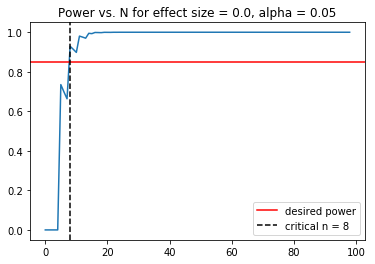

In [73]:
## Plot necessary quantities. The line is jagged in the beginning because the inverse cdf of the binomial
## does not exist for all points. 
plt.plot(power)
n_crit = np.where(np.array(power)>1-beta_des)[0][0]
plt.axhline(1-beta_des,color ='red',label = 'desired power')
plt.axvline(x = n_crit,linestyle = '--',color = 'black',label = 'critical n = {}'.format(n_crit))
plt.title('Power vs. N for effect size = {}, alpha = {}'.format(np.round(p1-p0,),alpha))

plt.legend()

plt.show()

In [62]:
n_crit

11